# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [34]:
# student 1: Adir 3020
# student 2: Ofir 3727

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [35]:
#import all necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
import numpy as np

In [36]:
#import datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# Sample of each data set
print("Training Data:")
print(train_data.head(5))

print("\nTesting Data:")
print(test_data.head(5))

Training Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Testing Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [37]:
#Prior to Exploratory Data Analysis, if needed, we will convert categorial features to numeric values,
#Clean the data from Null values, remove duplicate instances, etc.

print(train_data.dtypes)

numOfNulls = train_data.isnull().sum()
print("\nNum of Nulls per Feature :")
print(numOfNulls)

duplicated_instances = train_data[train_data.duplicated()]
numOfDuplicates = duplicated_instances.shape[0]
print(f"\nDuplicated Instances: {numOfDuplicates}")
if numOfDuplicates > 0:
    print(f"\nDuplicate rows: \n {duplicated_instances}")

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Survived      int64
dtype: object

Num of Nulls per Feature :
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Duplicated Instances: 80

Duplicate rows: 
      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
46        3    1  29.699118      0      0   7.2500         0         0
74        3    0  29.699118      3      1  25.4667         0         0
94        3    0  29.699118      0      0   7.7500         2         1
142       2    1  34.000000      0      0  13.0000         0         0
150       3    1  20.000000      0      0   7.8542         0         0
..      ...  ...        ...    ...    ...      ...       ...       ...
697       3    1  25.000000      0      0   7.0500         0         0
700       3    0  29.699118      0      0   7.7500         2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


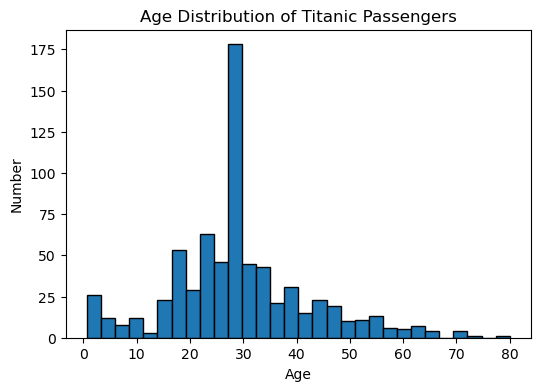

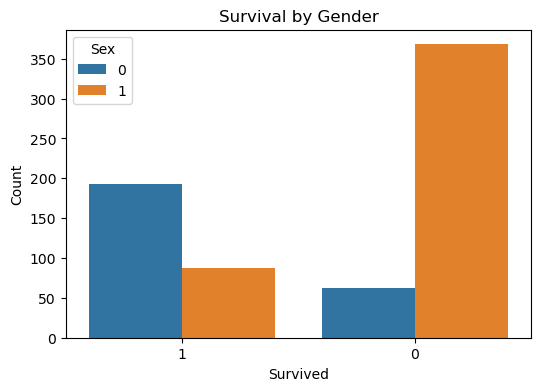

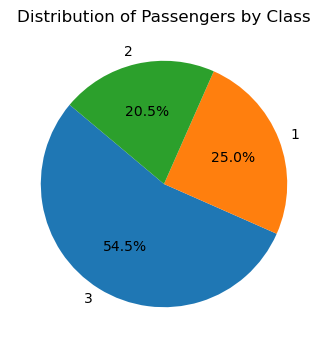

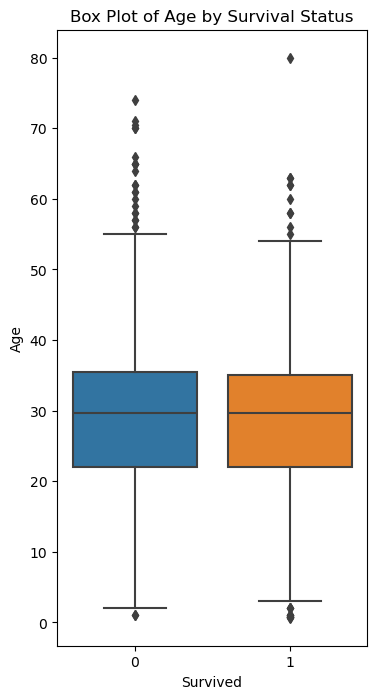

In [38]:
#EDA
#1 - All statisticsl info per Feature
display(train_data.describe())

#2 - Histogram - Age distribution
plt.figure(figsize=(6,4))
plt.hist(train_data['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Number')
plt.show()

#3 - Bar Plot - Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x=train_data['Survived'].astype(str), hue=train_data['Sex'].astype(str))
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#4 - Pie Chart - division to classes
class_counts = train_data['Pclass'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers by Class')
plt.show()

#5 - Boxplot - Survival according to Age
plt.figure(figsize=(4, 8))
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Box Plot of Age by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [39]:
# Split the dataset to Train and Validation sets, 80%-20% (5-fold)
x = train_data.drop(columns=['Survived'])
y= train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [40]:
#Create Pipeline - SKLearn object that creats a flow out of a few work stages
#In this case, scaling the data and modeling by KNN
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

#Grid Search - a Matrix-like presentation of the F1-score per each Hyperparameter combination
#In this case, N = Num of neighbors, P = Distance Metric
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__p': [1, 2, float('inf')] #p=1 for Manhattan distance, p=2 for Euclidean distance, p=INF for Chebychev
}

#Grid Search for 5-fold Cross-Validation
grid_search_KNN = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search_KNN.fit(X_train, y_train)

#Results
print("Best Hyperparameters : ", grid_search_KNN.best_params_)
print("Best F1-Score: ", grid_search_KNN.best_score_)


Best Hyperparameters :  {'knn__n_neighbors': 10, 'knn__p': inf}
Best F1-Score:  0.8019264034150705


In [41]:
#Create Pipeline - SKLearn object that creats a flow out of a few work stages
#In this case, scaling the data and modeling by Naive-Bayes
pipeline = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())])
param_grid = {}

#Grid Search for 5-fold Cross-Validation
grid_search_NB = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search_NB.fit(X_train, y_train)

#Results
print("Best Hyperparameters : ", grid_search_NB.best_params_)
print("Best F1-Score: ", grid_search_NB.best_score_)


Best Hyperparameters :  {}
Best F1-Score:  0.7754586494934872


In [42]:
#Create Pipeline - SKLearn object that creats a flow out of a few work stages
#In this case, scaling the data and modeling by Decision Tree
pipeline = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

#Grid Search - a Matrix-like presentation of the F1-score per each Hyperparameter combination
#In this case, Criteria, Max depth, Min samples split, Min samples leaf
param_grid = {
    'dt__criterion': ['entropy'],
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

#Grid Search for 5-fold Cross-Validation
grid_search_DT = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search_DT.fit(X_train, y_train)

#Results
print("Best Hyperparameters : ", grid_search_DT.best_params_)
print("Best F1-Score: ", grid_search_DT.best_score_)



Best Hyperparameters :  {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}
Best F1-Score:  0.776461115822008


In [43]:
#Comparing all ML models, at their peak performance (prior to Feature Engineering) according to the best Hyperparameters, on the train-set
results = {
    'Model': ['KNN', 'Naive-Bayes', 'Decision Tree'],
    'Best Hyperparameters': [grid_search_KNN.best_params_, grid_search_NB.best_params_, grid_search_DT.best_params_],
    'F1-Macro CV Score': [grid_search_KNN.best_score_, grid_search_NB.best_score_, grid_search_DT.best_score_],
}
results_df = pd.DataFrame(results)
display(results_df)


,Model,Best Hyperparameters,F1-Macro CV Score
0,KNN,"{'knn__n_neighbors': 10, 'knn__p': inf}",0.801926
1,Naive-Bayes,{},0.775459
2,Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.776461


In [44]:
# Retrieve the best estimator model per each ML model
Optimal_KNN = grid_search_KNN.best_estimator_
Optimal_NB = grid_search_NB.best_estimator_
Optimal_DT = grid_search_DT.best_estimator_

# Predict Survival classification per ML model, on the Validation-set (~16%)
KNN_predictions = Optimal_KNN.predict(X_test)
NB_predictions = Optimal_NB.predict(X_test)
DT_predictions = Optimal_DT.predict(X_test)

# F1 Scores per optimal ML Model
KNN_F1 = f1_score(y_test, KNN_predictions, average='macro')
NB_F1 = f1_score(y_test, NB_predictions, average='macro')
DT_F1 = f1_score(y_test, DT_predictions, average='macro')

#Results
validation_results = {
    'Model': ['KNN', 'Naive-Bayes', 'Decision Tree'],
    'Best Hyperparameters': [grid_search_KNN.best_params_, grid_search_NB.best_params_, grid_search_DT.best_params_],
    'F1-Macro Score on Validation': [KNN_F1, NB_F1, DT_F1],
}
validation_results_df = pd.DataFrame(validation_results)
display(validation_results_df)

,Model,Best Hyperparameters,F1-Macro Score on Validation
0,KNN,"{'knn__n_neighbors': 10, 'knn__p': inf}",0.761341
1,Naive-Bayes,{},0.733759
2,Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.708818


In [ ]:
#Feature Engineering

In [45]:
x_80 = train_data.drop(columns=['Survived'])
y_80 = train_data['Survived']

#1 Feature Engineering Method - Polynomial Features
#Adding new features from existing ones
features = x_80[['Age', 'Fare', 'Parch']]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features)
poly_feature_names = poly.get_feature_names_out(['Age', 'Fare', 'Parch'])
df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)
#display(df_poly)
x_80.reset_index(drop=True, inplace=True)
#display(x_80)
x_80 = pd.concat([x_80, df_poly], axis=1)
display(x_80)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age,Fare,Parch,Age^2,Age Fare,Age Parch,Fare^2,Fare Parch,Parch^2
0,1,0,54.000000,1,0,78.2667,1,54.000000,78.2667,0.0,2916.000000,4226.4018,0.0,6125.676329,0.0,0.0
1,2,0,45.000000,0,0,13.5000,0,45.000000,13.5000,0.0,2025.000000,607.5000,0.0,182.250000,0.0,0.0
2,3,1,20.000000,0,0,9.5000,0,20.000000,9.5000,0.0,400.000000,190.0000,0.0,90.250000,0.0,0.0
3,3,1,36.000000,0,0,7.8958,0,36.000000,7.8958,0.0,1296.000000,284.2488,0.0,62.343658,0.0,0.0
4,3,1,22.000000,0,0,8.0500,0,22.000000,8.0500,0.0,484.000000,177.1000,0.0,64.802500,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625,0,54.000000,51.8625,0.0,2916.000000,2800.5750,0.0,2689.718906,0.0,0.0
708,3,1,14.000000,5,2,46.9000,0,14.000000,46.9000,2.0,196.000000,656.6000,28.0,2199.610000,93.8,4.0
709,2,0,6.000000,0,1,33.0000,0,6.000000,33.0000,1.0,36.000000,198.0000,6.0,1089.000000,33.0,1.0
710,2,1,29.699118,0,0,0.0000,0,29.699118,0.0000,0.0,882.037589,0.0000,0.0,0.000000,0.0,0.0


In [46]:
#2 Feature Engineering Method - Omitting the 6 least correlated features to the labels
newFeatures_corr_to_labels = x_80.corrwith(y_80)
display(newFeatures_corr_to_labels)
print("\n")

#Most uncorrelated features to labels
display(newFeatures_corr_to_labels.abs().sort_values())

#Drop 6 of those mentioned Features
x_80 = x_80.drop(columns = newFeatures_corr_to_labels.abs().sort_values().head(6).index)
print("\n")
print(x_80.shape[0])
print(x_80.shape)
print("\n")
display(x_80)
#display(X_train)
print("\n")
#X_train_split, X_test_split = train_test_split(x_data_train, test_size=0.2, random_state=42)
#display(X_train_split)

Pclass       -0.324024
Sex          -0.550699
Age          -0.072729
SibSp        -0.031052
Parch         0.074699
Fare          0.264345
Embarked      0.099162
Age          -0.072729
Fare          0.264345
Parch         0.074699
Age^2        -0.053158
Age Fare      0.229317
Age Parch     0.013835
Fare^2        0.155322
Fare Parch    0.110954
Parch^2       0.006705
dtype: float64

Parch^2       0.006705
Age Parch     0.013835
SibSp         0.031052
Age^2         0.053158
Age           0.072729
Age           0.072729
Parch         0.074699
Parch         0.074699
Embarked      0.099162
Fare Parch    0.110954
Fare^2        0.155322
Age Fare      0.229317
Fare          0.264345
Fare          0.264345
Pclass        0.324024
Sex           0.550699
dtype: float64



712
(712, 10)




,Pclass,Sex,Parch,Fare,Embarked,Fare,Parch,Age Fare,Fare^2,Fare Parch
0,1,0,0,78.2667,1,78.2667,0.0,4226.4018,6125.676329,0.0
1,2,0,0,13.5000,0,13.5000,0.0,607.5000,182.250000,0.0
2,3,1,0,9.5000,0,9.5000,0.0,190.0000,90.250000,0.0
3,3,1,0,7.8958,0,7.8958,0.0,284.2488,62.343658,0.0
4,3,1,0,8.0500,0,8.0500,0.0,177.1000,64.802500,0.0
...,...,...,...,...,...,...,...,...,...,...
707,1,1,0,51.8625,0,51.8625,0.0,2800.5750,2689.718906,0.0
708,3,1,2,46.9000,0,46.9000,2.0,656.6000,2199.610000,93.8
709,2,0,1,33.0000,0,33.0000,1.0,198.0000,1089.000000,33.0
710,2,1,0,0.0000,0,0.0000,0.0,0.0000,0.000000,0.0


In [47]:
x_64, x_16, y_64, y_16 = train_test_split(x_80, y_80, test_size=0.2, random_state=42)

In [48]:
#Create Pipeline - SKLearn object that creats a flow out of a few work stages
#In this case, scaling the data and modeling by KNN
pipeline = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

#Grid Search - a Matrix-like presentation of the F1-score per each Hyperparameter combination
#In this case, N = Num of neighbors, P = Distance Metric
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__p': [1, 2, float('inf')] #p=1 for Manhattan distance, p=2 for Euclidean distance, p=INF for Chebychev
}

#Grid Search for 5-fold Cross-Validation
grid_search_KNN = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search_KNN.fit(x_64, y_64)

#Results
print("Best Hyperparameters : ", grid_search_KNN.best_params_)
print("Best F1-Score: ", grid_search_KNN.best_score_)

Best Hyperparameters :  {'knn__n_neighbors': 3, 'knn__p': 2}
Best F1-Score:  0.7820793096554022


In [49]:
#Create Pipeline - SKLearn object that creats a flow out of a few work stages
#In this case, scaling the data and modeling by Naive-Bayes
pipeline = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())])
param_grid = {}

#Grid Search for 5-fold Cross-Validation
grid_search_NB = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search_NB.fit(x_80, y_80)

#Results
print("Best Hyperparameters : ", grid_search_NB.best_params_)
print("Best F1-Score: ", grid_search_NB.best_score_)


Best Hyperparameters :  {}
Best F1-Score:  0.590885227764274


In [50]:
#Create Pipeline - SKLearn object that creats a flow out of a few work stages
#In this case, scaling the data and modeling by Decision Tree
pipeline = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

#Grid Search - a Matrix-like presentation of the F1-score per each Hyperparameter combination
#In this case, Criteria, Max depth, Min samples split, Min samples leaf
param_grid = {
    'dt__criterion': ['entropy'],
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

#Grid Search for 5-fold Cross-Validation
grid_search_DT = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
grid_search_DT.fit(x_80, y_80)

#Results
print("Best Hyperparameters : ", grid_search_DT.best_params_)
print("Best F1-Score: ", grid_search_DT.best_score_)


Best Hyperparameters :  {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 10}
Best F1-Score:  0.7743745797562364


In [51]:
#Comparing all ML models, at their peak performance (prior to Feature Engineering) according to the best Hyperparameters, on the train-set
results = {
    'Model': ['KNN', 'Naive-Bayes', 'Decision Tree'],
    'Best Hyperparameters': [grid_search_KNN.best_params_, grid_search_NB.best_params_, grid_search_DT.best_params_],
    'F1-Macro CV Score': [grid_search_KNN.best_score_, grid_search_NB.best_score_, grid_search_DT.best_score_],
}
results_df = pd.DataFrame(results)
display(results_df)


,Model,Best Hyperparameters,F1-Macro CV Score
0,KNN,"{'knn__n_neighbors': 3, 'knn__p': 2}",0.782079
1,Naive-Bayes,{},0.590885
2,Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.774375


In [52]:
# Retrieve the best estimator model per each ML model
Optimal_KNN = grid_search_KNN.best_estimator_
Optimal_NB = grid_search_NB.best_estimator_
Optimal_DT = grid_search_DT.best_estimator_

# Predict Survival classification per ML model, on the Validation-set (~16%)
KNN_predictions = Optimal_KNN.predict(x_16)
NB_predictions = Optimal_NB.predict(x_16)
DT_predictions = Optimal_DT.predict(x_16)

# F1 Scores per optimal ML Model
KNN_F1 = f1_score(y_test, KNN_predictions, average='macro')
NB_F1 = f1_score(y_test, NB_predictions, average='macro')
DT_F1 = f1_score(y_test, DT_predictions, average='macro')

#Results
validation_results = {
    'Model': ['KNN', 'Naive-Bayes', 'Decision Tree'],
    'Best Hyperparameters': [grid_search_KNN.best_params_, grid_search_NB.best_params_, grid_search_DT.best_params_],
    'F1-Macro Score on Validation': [KNN_F1, NB_F1, DT_F1],
}
validation_results_df = pd.DataFrame(validation_results)
display(validation_results_df)

,Model,Best Hyperparameters,F1-Macro Score on Validation
0,KNN,"{'knn__n_neighbors': 3, 'knn__p': 2}",0.742703
1,Naive-Bayes,{},0.578756
2,Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.900339


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [53]:
DT_predictions = Optimal_DT.predict(x_80)
DT_F1 = f1_score(y_80, DT_predictions, average='macro')
validation_results = {
    'Model': 'Decision Tree',
    'Best Hyperparameters': grid_search_DT.best_params_,
    'F1-Macro Score on wholw Train-set': DT_F1
}
validation_results_df = pd.DataFrame(validation_results)
display(validation_results_df)

,Model,Best Hyperparameters,F1-Macro Score on wholw Train-set
dt__criterion,Decision Tree,entropy,0.899143
dt__max_depth,Decision Tree,10,0.899143
dt__min_samples_leaf,Decision Tree,1,0.899143
dt__min_samples_split,Decision Tree,10,0.899143


## Part 5 - Apply on test and show model performance estimation

In [54]:
x_20 = test_data.drop(columns=['Survived'])
y_20 = test_data['Survived']

display(x_20)
display(y_20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,35.000000,0,0,7.0500,0
1,3,1,30.000000,0,0,7.2500,0
2,3,1,29.699118,0,0,14.5000,0
3,3,0,21.000000,0,0,7.7500,2
4,3,1,32.000000,0,0,56.4958,0
...,...,...,...,...,...,...,...
174,3,1,29.000000,0,0,7.7500,2
175,3,0,45.000000,0,1,14.4542,1
176,2,1,23.000000,0,0,13.0000,0
177,3,1,40.000000,1,4,27.9000,0


0      0
1      0
2      0
3      0
4      1
      ..
174    1
175    0
176    0
177    0
178    0
Name: Survived, Length: 179, dtype: int64

In [55]:
test_features = x_20[['Age', 'Fare', 'Parch']]
test_poly = PolynomialFeatures(degree=2, include_bias=False)
test_poly_features = poly.fit_transform(test_features)
test_poly_feature_names = poly.get_feature_names_out(['Age', 'Fare', 'Parch'])
test_df_poly = pd.DataFrame(test_poly_features, columns=test_poly_feature_names)
#display(test_df_poly)
x_20.reset_index(drop=True, inplace=True)
#display(x_20)
x_20 = pd.concat([x_20, test_df_poly], axis=1)
display(x_20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age,Fare,Parch,Age^2,Age Fare,Age Parch,Fare^2,Fare Parch,Parch^2
0,3,1,35.000000,0,0,7.0500,0,35.000000,7.0500,0.0,1225.000000,246.750000,0.0,49.702500,0.0000,0.0
1,3,1,30.000000,0,0,7.2500,0,30.000000,7.2500,0.0,900.000000,217.500000,0.0,52.562500,0.0000,0.0
2,3,1,29.699118,0,0,14.5000,0,29.699118,14.5000,0.0,882.037589,430.637206,0.0,210.250000,0.0000,0.0
3,3,0,21.000000,0,0,7.7500,2,21.000000,7.7500,0.0,441.000000,162.750000,0.0,60.062500,0.0000,0.0
4,3,1,32.000000,0,0,56.4958,0,32.000000,56.4958,0.0,1024.000000,1807.865600,0.0,3191.775418,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,3,1,29.000000,0,0,7.7500,2,29.000000,7.7500,0.0,841.000000,224.750000,0.0,60.062500,0.0000,0.0
175,3,0,45.000000,0,1,14.4542,1,45.000000,14.4542,1.0,2025.000000,650.439000,45.0,208.923898,14.4542,1.0
176,2,1,23.000000,0,0,13.0000,0,23.000000,13.0000,0.0,529.000000,299.000000,0.0,169.000000,0.0000,0.0
177,3,1,40.000000,1,4,27.9000,0,40.000000,27.9000,4.0,1600.000000,1116.000000,160.0,778.410000,111.6000,16.0


In [56]:
#2 Feature Engineering Method - Omitting the 6 least correlated features to the labels
test_newFeatures_corr_to_labels = x_20.corrwith(y_20)
display(test_newFeatures_corr_to_labels)
print("\n")

#Most uncorrelated features to labels
display(test_newFeatures_corr_to_labels.abs().sort_values())

#Drop 6 of those mentioned Features
x_20 = x_20.drop(columns = test_newFeatures_corr_to_labels.abs().sort_values().head(6).index)
print("\n")
print(x_20.shape[0])
print(x_20.shape)
display(x_20)
print("\n")


Pclass       -0.395163
Sex          -0.509608
Age          -0.051222
SibSp        -0.052441
Parch         0.108239
Fare          0.227792
Embarked      0.194596
Age          -0.051222
Fare          0.227792
Parch         0.108239
Age^2         0.012770
Age Fare      0.201966
Age Parch     0.024237
Fare^2        0.117220
Fare Parch    0.053246
Parch^2      -0.004670
dtype: float64

Parch^2       0.004670
Age^2         0.012770
Age Parch     0.024237
Age           0.051222
Age           0.051222
SibSp         0.052441
Fare Parch    0.053246
Parch         0.108239
Parch         0.108239
Fare^2        0.117220
Embarked      0.194596
Age Fare      0.201966
Fare          0.227792
Fare          0.227792
Pclass        0.395163
Sex           0.509608
dtype: float64



179
(179, 10)


,Pclass,Sex,Parch,Fare,Embarked,Fare,Parch,Age Fare,Fare^2,Fare Parch
0,3,1,0,7.0500,0,7.0500,0.0,246.750000,49.702500,0.0000
1,3,1,0,7.2500,0,7.2500,0.0,217.500000,52.562500,0.0000
2,3,1,0,14.5000,0,14.5000,0.0,430.637206,210.250000,0.0000
3,3,0,0,7.7500,2,7.7500,0.0,162.750000,60.062500,0.0000
4,3,1,0,56.4958,0,56.4958,0.0,1807.865600,3191.775418,0.0000
...,...,...,...,...,...,...,...,...,...,...
174,3,1,0,7.7500,2,7.7500,0.0,224.750000,60.062500,0.0000
175,3,0,1,14.4542,1,14.4542,1.0,650.439000,208.923898,14.4542
176,2,1,0,13.0000,0,13.0000,0.0,299.000000,169.000000,0.0000
177,3,1,4,27.9000,0,27.9000,4.0,1116.000000,778.410000,111.6000


In [57]:
DT_predictions = Optimal_DT.predict(x_20)
DT_predictions_series = pd.Series(DT_predictions)

print("\n")
Top_5_predictions = {
    "Predictions" : DT_predictions_series.head(),
    "Ground Truths" : y_20.head()
}
Top_5_predictions_df = pd.DataFrame(Top_5_predictions)
display(Top_5_predictions_df)
print("\n")

DT_F1 = f1_score(y_20, DT_predictions, average='macro')
test_results = {
    'Model': 'Decision Tree',
    'Best Hyperparameters': grid_search_DT.best_params_,
    'F1-Macro Score on wholw Test-set': DT_F1
}

print("Confusion Matrix : \n")
conf_matrix = confusion_matrix(y_20, DT_predictions)
print(conf_matrix)

print("\n")
test_results_df = pd.DataFrame(test_results)
display(test_results_df)

,Predictions,Ground Truths
0,0,0
1,0,0
2,0,0
3,1,0
4,1,1




Confusion Matrix : 

[[106  12]
 [ 22  39]]




,Model,Best Hyperparameters,F1-Macro Score on wholw Test-set
dt__criterion,Decision Tree,entropy,0.779109
dt__max_depth,Decision Tree,10,0.779109
dt__min_samples_leaf,Decision Tree,1,0.779109
dt__min_samples_split,Decision Tree,10,0.779109
